# Randomization (part 2): randomized paired comparison design

Let us apply the randomization concept to comparisons done within matched pairs. This greatly increases the precision of the test.

Experiment on boys' shoes:
- want to measure the amount of wear and boys' shoes
- material A is the original
- material B is the new one, cheaper but suspected to not be as durable and incur more tear
- run experiments on 10 boys, each wearing a shoe with sole A and sole B, the right or left foot chosen randomly

In [15]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
pd.set_option('display.max_rows', 500)
y_210 = pd.read_excel('yield 210.xlsx')
y_AB = pd.read_excel('yield 20.xlsx')

In [16]:
df = pd.DataFrame({'A wear':[13.2,8.2,10.9,14.3,10.7,6.6,9.5,10.8,8.8,13.3],
                   'A shoe':list('LLRLRLLLRL'),
                   'B wear':[14.0,8.8,11.2,14.2,11.8,6.4,9.8,11.3,9.3,13.6],
                   'B shoe':list('RRLRLRRRLR')},
                 index=np.arange(1,11))
df.index.name = 'boy'
df['d'] = df['B wear'] - df['A wear']
print('average of difference d of wear between shoe B and A is {:.02f}'.format(df['d'].mean(axis=0)))
df

average of difference d of wear between shoe B and A is 0.41


,A wear,A shoe,B wear,B shoe,d
boy,,,,,
1,13.2,L,14.0,R,0.8
2,8.2,L,8.8,R,0.6
3,10.9,R,11.2,L,0.3
4,14.3,L,14.2,R,-0.1
5,10.7,R,11.8,L,1.1
6,6.6,L,6.4,R,-0.2
7,9.5,L,9.8,R,0.3
8,10.8,L,11.3,R,0.5
9,8.8,R,9.3,L,0.5


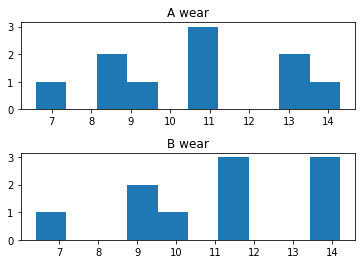

In [17]:
# first quick histogram as if we did not know the data was collected in matched pairs
fig, ax = plt.subplots(2,1)
ax[0].hist(df['A wear'])
ax[1].hist(df['B wear'])
ax[0].set_title('A wear')
ax[1].set_title('B wear')
plt.subplots_adjust(hspace=0.5)

One can see that nothing stands out: the wear of material A seems to have same distribution as the wear of material B

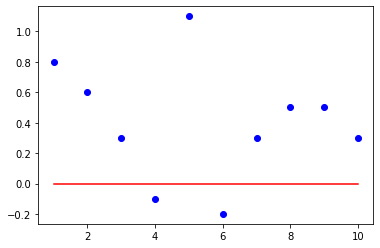

In [18]:
# now let's look at the difference d between wear of B and wear of A on the same child
plt.plot(df.index,df['d'],'bo')
plt.plot(df.index,[0]*10,'r-')

One can see a very different picture now: 8 data points above 0 line suggest that the wear on B is higher than wear on A.
    
Why are the differences telling more than the individual data points? Because they remove the effect of each child. Children use their shores differently: some may be more active, some others less. Some may jump or play a sport that uses the shoes more than others. If we look at the data, regardless of the boys, the individual effect of each child's usage of the shoe is embedded in the data. If we look at the differences only, we remove the individual effect of each child's usage from the data. This is an important and profound concept.

## Randomization

Now let's run the randomization approach. Let us assume that the level of wear is the same for material A and B. In other words, boy 1's wear for left shoe will be 13.2, regardless of whether it is made with material A or B and his right shoe's wear will be 14.0, regardless of whether it is made with material A or B. There are $2^{10}$ (1,024) combinations, merely affecting the sign of the difference of wear for each boy. We will compare 0.41 to the distributions of averages for the 1,024 combinations to determine p value and statistical significance of the null hypothesis. If p value is less than 5%, this means 0.41 value is highly unlikely and we will rule out the null hypothesis.

we derived all the possible 1024 outcomes
there are 7 combinations with mean above or equal to 0.41
[[1, 1, 1, -1, 1, -1, 1, 1, 1, -1], [1, 1, 1, -1, 1, -1, -1, 1, 1, 1], [1, 1, -1, -1, 1, -1, 1, 1, 1, 1], [1, 1, 1, -1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


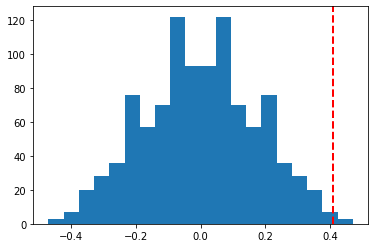

In [19]:
# here we are deriving the mean for all the possible 1,024 outcomes
import itertools
r_mean_list = []
r_mean_above_ref = []
counter=0
for i in range(11):
    for v in itertools.combinations(range(1,11),i):
        s=[1 if j in v else -1 for j in range(1,11)]
        r_mean = (df['d']*s).mean()
        r_mean_list.append(r_mean)
        if r_mean > 0.41:
            r_mean_above_ref.append(s)       
        counter +=1
print('we derived all the possible {} outcomes'.format(counter)) 
print('there are {} combinations with mean above or equal to 0.41'.format(len(r_mean_above_ref)))
print(r_mean_above_ref)
plt.hist(r_mean_list,bins=20)
plt.axvline(0.41, color='r', linestyle='dashed', linewidth=2)

As we can see, there are 7 combinations out of 1,024 with means above or equal to 0.41. This includes the sample itself. 

Box separates the values striclty above 0.41 (3) from the ones equal to 0.41 (4, including the original sample) of which he takes only half of them (2). His level of significance therefore becomes 5/1024 = 0.5%, which is a statistically significant p value.

We can say that material B is subject to more wear than material A.

## Random sampling assumption and the t distribution

Now let's asssume that the sample we obtained with mean 0.41 is obtained from random sampling from a normal population of differences between the two normal populations of wear for material A and material B.

This allows us to use the following property: if a random sample of n observations is drawn from a normal distribution with mean $\eta$ and variance $\sigma^2$, then the quantity $(\bar{y} - \eta)/(s/\sqrt{n})$ is distributed with n - 1 degrees of freedom in the t distribution.

Thus we consider the differences 0.8, 0.6, 0.3, etc. as a sample from normal population of differences and must compute the statistic $(\bar{d} - \delta)/(s_d/\sqrt{n})$ which is distributed as t with n - 1 degrees of freedom.

Two important notes:
1. if we compare this approach with part 2 of the comparison of two means, there is a big difference. In the comparison of two means, we have an external reference distribution so the difference of averages is considered as one element of a population of difference of averages, NOT AS A SAMPLE. This allows for the use of the t distribution without the $\sqrt{n}$ factor in the denominator because we are just comparing elements of the population, NOT ANY SAMPLE.

|  | part 2 mean comparison | randomization paired |
| --- | --- | --- |
| **population** | difference of averages of 10 yields | difference of wear of two materials |
| **statistic** | one difference of averages of 10 yields with t test; s measured based on reference population | sample of 10 differences of wear with t test; s measured based on sample; $\sqrt{n}$ factor | 

2. if we compare this approach with part 3 and 4 of the comparison of two means, one difference is that we do not compute the pooled variance. My explanation for that is that 
  - we probably do not have enough samples for proper variance estimate (5 for each material A or B, vs. 10 yields in part 3 and 4 
  - in part 3 and 4, we have one process with two treatments so it makes sense that they have the same variance $\sigma^2$. This may not be the case for shoe material A and B which may have been manufactured differently, thus resulting in different variances
  
There will be cases where it makes more sense to consider the difference of averages as the difference of two random variables whose sample average has variance $\sigma^2/n$ and compute pooled variance like we did in part 3 and 4 of the comparison of two means. There will be other cases (like this randomization example) where we stay at a higher level and just treat the difference of averages as a normal variable, without drilling down further. When to make that calls makes intuitive sense based on remarks above but is probably something to discuss with a real statistician.


In [28]:
# let's compute the t statistic
y_bar = 0.41
delta = 0 # null hypothesis
sd = (1/9)*(sum((df['d'] - y_bar)**2))
t = (y_bar - delta)/math.sqrt(sd/10)
p_value = 1-st.t.cdf(t,df=9,loc=0,scale=1)
print('sd is {:.03f}, t is {:.02f}, p value is {:.03f}%'.format(sd,t,100*p_value))

sd is 0.150, t is 3.35, p value is 0.427%


The level of significance of 0.4% is very close to the level of 0.5% found in the randomization simulation.

This confirms that the randomization approach allows us to use t test to test statistical significance.

**Let's remember we can use t test to analyze randomized paired experiments.**